In [1]:
#  https://www.cienciadedatos.net/documentos/py24-svm-python.html#:~:text=M%C3%A1quinas%20de%20Vector%20Soporte%20(Vector,campo%20de%20la%20ciencia%20computacional.

# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

# Preprocesado y modelado
# ==============================================================================
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [20]:
#DATOS
d = pd.read_csv("CSV_Informacion_Categorizada/cont_sent_CR_PE_MX_UY")
df= d.rename(columns={'Unnamed: 0':'index'})
df.head(3)

,index,Content,Sentiment
0,0,@NoilyMV yo soy totalmente puntual,NONE
1,1,@SandraCauffman Hola Sandrita. No le habia des...,P
2,2,Si andan haciendo eso mejor se quedaran callad...,N


In [21]:
df['Sentiment'] = df.Sentiment.map({'NEU':0, 'P':1,'N':2,'NONE':3})
df

,index,Content,Sentiment
0,0,@NoilyMV yo soy totalmente puntual,3
1,1,@SandraCauffman Hola Sandrita. No le habia des...,1
2,2,Si andan haciendo eso mejor se quedaran callad...,2
3,3,Que pereza quiero choco banano,2
4,4,"@robertobrenes Bueno, no es tanto lo mayor com...",2
...,...,...,...
3670,938,@AmorAKilates @Roocio_Mk si me pasa lo mismo!,3
3671,939,@clauchoarrionda pquno ladra y ls demas retwitean,0
3672,940,A mi desayuno le hizo falta un alfajor podrida...,2
3673,941,Viste cuando necesitas que alguien te escuche ...,2


In [23]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(df.index, df.Content, c=df.Sentiment);
ax.set_title("Datos contenido y sentimiento");

ValueError: 
@veronica_alonso @RamelaCarlos dice q no existe clase media de donde cree q sale $$ para las subvenciones, de Disney?, ah no, tampoco.
                                                                                 ^
Expected end of text, found '$'  (at char 81), (line:1, col:82)

<Figure size 432x288 with 1 Axes>

In [28]:
# División de los datos en train y test
# ==============================================================================
from sklearn.model_selection import train_test_split

X = df.drop(columns = 'Sentiment')
y = df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [29]:
# Creación del modelo SVM lineal
# ==============================================================================
modelo = SVC(C = 100, kernel = 'linear', random_state=123)
modelo.fit(X_train, y_train)

ValueError: could not convert string to float: '@JArmandoCS solo me quedan 3 sábados más así jiji. ¿Qué días estás yendo a la U que no te he visto?'

In [30]:
# Representación gráfica de los límites de clasificación
# ==============================================================================
# Grid de valores
x = np.linspace(np.min(X_train.index), np.max(X_train.index), 50)
y = np.linspace(np.min(X_train.Content), np.max(X_train.Content), 50)
Y, X = np.meshgrid(y, x)
grid = np.vstack([X.ravel(), Y.ravel()]).T

# Predicción valores grid
pred_grid = modelo.predict(grid)

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(grid[:,0], grid[:,1], c=pred_grid, alpha = 0.2)
ax.scatter(X_train.index, X_train.Content, c=y_train, alpha = 1)

# Vectores soporte
ax.scatter(
    modelo.support_vectors_[:, 0],
    modelo.support_vectors_[:, 1],
    s=200, linewidth=1,
    facecolors='none', edgecolors='black'
)

# Hiperplano de separación
ax.contour(
    X,
    Y,
    modelo.decision_function(grid).reshape(X.shape),
    colors = 'k',
    levels = [-1, 0, 1],
    alpha  = 0.5,
    linestyles = ['--', '-', '--']
)

ax.set_title("Resultados clasificación SVM lineal");

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U110'), dtype('float64')) -> None

In [31]:
predicciones = modelo.predict(X_test)
predicciones

ValueError: could not convert string to float: 'Es criminal que me hagan caminar tanto hoy'

In [32]:
# Accuracy de test del modelo 
# ==============================================================================
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")

NameError: name 'predicciones' is not defined

In [33]:
# Grid de hiperparámetros
# ==============================================================================
param_grid = {'C': np.logspace(-5, 7, 20)}

# Búsqueda por validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = SVC(kernel= "rbf", gamma='scale'),
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = -1,
        cv         = 3, 
        verbose    = 0,
        return_train_score = True
      )

# Se asigna el resultado a _ para que no se imprima por pantalla
_ = grid.fit(X = X_train, y = y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(5)

ValueError: 
All the 60 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/home/calybeth/Escritorio/soft/entornos/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/calybeth/Escritorio/soft/entornos/lib/python3.10/site-packages/sklearn/svm/_base.py", line 173, in fit
    X, y = self._validate_data(
  File "/home/calybeth/Escritorio/soft/entornos/lib/python3.10/site-packages/sklearn/base.py", line 596, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/home/calybeth/Escritorio/soft/entornos/lib/python3.10/site-packages/sklearn/utils/validation.py", line 1074, in check_X_y
    X = check_array(
  File "/home/calybeth/Escritorio/soft/entornos/lib/python3.10/site-packages/sklearn/utils/validation.py", line 856, in check_array
    array = np.asarray(array, order=order, dtype=dtype)
  File "/home/calybeth/Escritorio/soft/entornos/lib/python3.10/site-packages/pandas/core/generic.py", line 2064, in __array__
    return np.asarray(self._values, dtype=dtype)
ValueError: could not convert string to float: 'Ya estuviera re descontrolado jajajajja'

--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/home/calybeth/Escritorio/soft/entornos/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/calybeth/Escritorio/soft/entornos/lib/python3.10/site-packages/sklearn/svm/_base.py", line 173, in fit
    X, y = self._validate_data(
  File "/home/calybeth/Escritorio/soft/entornos/lib/python3.10/site-packages/sklearn/base.py", line 596, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/home/calybeth/Escritorio/soft/entornos/lib/python3.10/site-packages/sklearn/utils/validation.py", line 1074, in check_X_y
    X = check_array(
  File "/home/calybeth/Escritorio/soft/entornos/lib/python3.10/site-packages/sklearn/utils/validation.py", line 856, in check_array
    array = np.asarray(array, order=order, dtype=dtype)
  File "/home/calybeth/Escritorio/soft/entornos/lib/python3.10/site-packages/pandas/core/generic.py", line 2064, in __array__
    return np.asarray(self._values, dtype=dtype)
ValueError: could not convert string to float: '@JArmandoCS solo me quedan 3 sábados más así jiji. ¿Qué días estás yendo a la U que no te he visto?'


In [34]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

modelo = grid.best_estimator_

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------


AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [35]:
# Representación gráfica de los límites de clasificación
# ==============================================================================
# Grid de valores
x = np.linspace(np.min(X_train.X1), np.max(X_train.X1), 50)
y = np.linspace(np.min(X_train.X2), np.max(X_train.X2), 50)
Y, X = np.meshgrid(y, x)
grid = np.vstack([X.ravel(), Y.ravel()]).T

# Predicción valores grid
pred_grid = modelo.predict(grid)

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(grid[:,0], grid[:,1], c=pred_grid, alpha = 0.2)
ax.scatter(X_train.index, X_train.Content, c=y_train, alpha = 1)

# Vectores soporte
ax.scatter(
    modelo.support_vectors_[:, 0],
    modelo.support_vectors_[:, 1],
    s=200, linewidth=1,
    facecolors='none', edgecolors='black'
)

# Hiperplano de separación
ax.contour(
    X,
    Y,
    modelo.decision_function(grid).reshape(X.shape),
    colors='k',
    levels=[0],
    alpha=0.5,
    linestyles='-'
)

ax.set_title("Resultados clasificación SVM radial");

AttributeError: 'DataFrame' object has no attribute 'X1'

ValueError: X must be an integer or float array. Found object.

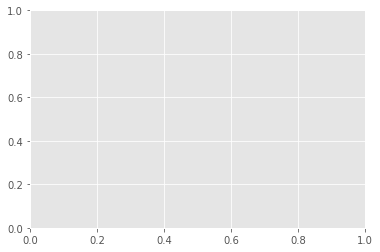

In [36]:
# Representación gráfica utilizando plot_decision_regions() de mlxtend
# ==============================================================================
fig, ax = plt.subplots(figsize=(6,4))
plot_decision_regions(
    X = X_train.to_numpy(),
    y = y_train.flatten(),
    clf = modelo,
    ax = ax
)
ax.set_title("Resultados clasificación SVM radial");

In [37]:
# Predicciones test
# ==============================================================================
predicciones = modelo.predict(X_test)

ValueError: could not convert string to float: 'Es criminal que me hagan caminar tanto hoy'

In [38]:
# Accuracy de test del modelo 
# ==============================================================================
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")

NameError: name 'predicciones' is not defined

In [39]:
# Matriz de confusión de las predicciones de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    predicciones,
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix

NameError: name 'predicciones' is not defined

In [40]:
from sinfo import sinfo
sinfo()

The `sinfo` package has changed name and is now called `session_info` to become more discoverable and self-explanatory. The `sinfo` PyPI package will be kept around to avoid breaking old installs and you can downgrade to 0.3.2 if you want to use it without seeing this message. For the latest features and bug fixes, please install `session_info` instead. The usage and defaults also changed slightly, so please review the latest README at https://gitlab.com/joelostblom/session_info.
-----
matplotlib  3.5.2
mlxtend     0.20.0
numpy       1.23.0
pandas      1.4.3
seaborn     0.11.2
sinfo       0.3.4
sklearn     1.1.1
-----
IPython             8.4.0
jupyter_client      7.3.4
jupyter_core        4.10.0
notebook            6.4.12
-----
Python 3.10.4 (main, Apr  2 2022, 09:04:19) [GCC 11.2.0]
Linux-5.15.0-41-generic-x86_64-with-glibc2.35
4 logical CPU cores, x86_64
-----
Session information updated at 2022-07-14 02:55
